In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.optimize import curve_fit

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%precision 4

'%.4f'

1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-lieve of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [3]:
# simulation settings
T_sim = 45.0
N_steps = int(T_sim*60)
N0_TL = 1000
N0_PB = 0
T_1half = 3.052*60.
# printing
print(f"Simulation time: {T_sim} s")
print(f"N of steps: {N_steps}")
print(f"N0 TL: {N0_TL}")
print(f"N0 PB: {N0_PB}")
print(f"TL1/2: {T_1half} s")

Simulation time: 45.0 s
N of steps: 2700
N0 TL: 1000
N0 PB: 0
TL1/2: 183.12 s


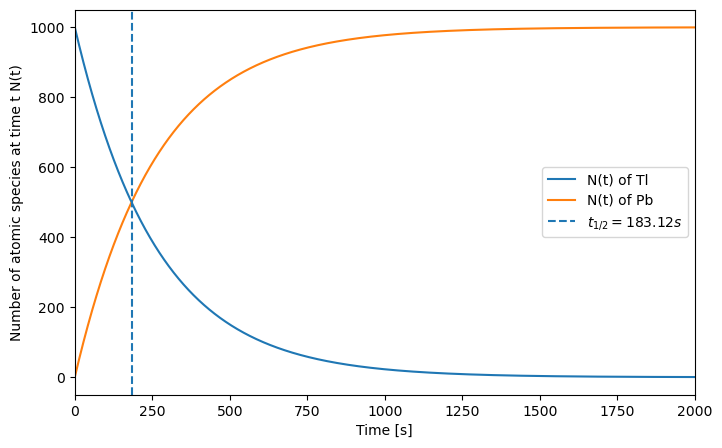

In [4]:
# running the simulation
t = np.linspace(0,60*T_sim,N_steps+1)
# defining the probability of decay
def p_decay(t, T_1half=T_1half):
    return 1.0 - 2.0**(-1.0*t/T_1half)
# calculating the decays in time
decayed_TL = N0_TL*p_decay(t)
N_TL = N0_TL - decayed_TL
N_PB = decayed_TL.copy()
# plotting them
fig = plt.figure(figsize=(8,5))
ax = plt.subplot2grid((1,1), loc=(0,0), fig=fig)
ax.plot(t, N_TL, label="N(t) of Tl")
ax.plot(t, N_PB, label="N(t) of Pb")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Number of atomic species at time t N(t)")
ax.axvline(T_1half, label=f"$t_{{1/2}} = {T_1half} s$", ls='--')
ax.set_xlim(0,2000)
ax.legend(loc="center right")

In [5]:
# inverse sampling
def t_inv(u, t_1H = T_1half):
    return -1.0*t_1H*np.log2(1.0 - u)

(0.0000, 2000.0000)

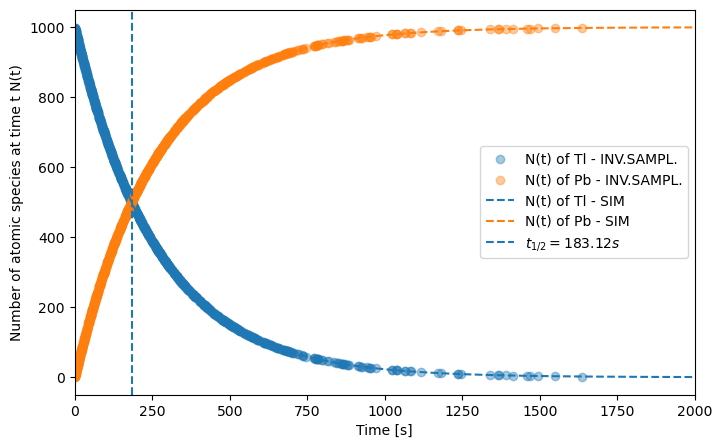

In [6]:
t_decay = t_inv(np.random.random(1000))
N_PB_t = p_decay(t_decay)*N0_TL
N_TL_t = N0_TL - N_PB_t

# plotting
fig = plt.figure(figsize=(8,5))
ax = plt.subplot2grid((1,1), loc=(0,0), fig=fig)
ax.scatter(t_decay, N_TL_t, marker='o', alpha=0.4, label="N(t) of Tl - INV.SAMPL.")
ax.scatter(t_decay, N_PB_t, marker='o', alpha=0.4, label="N(t) of Pb - INV.SAMPL.")
ax.plot(t, N_TL, ls='--', label="N(t) of Tl - SIM")
ax.plot(t, N_PB, ls='--', label="N(t) of Pb - SIM")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Number of atomic species at time t N(t)")
ax.axvline(T_1half, label=f"$t_{{1/2}} = {T_1half} s$", ls='--')
ax.legend(loc="center right")
ax.set_xlim(left=0, right=2000)

2\. **Rutherford Scattering**

The scattering angle $\theta$ of $\alpha$ particles hitting a positively charged nucleus of a Gold atom ($Z=79$) follows the rule:

$$
\tan{\frac{1}{2} \theta} = \frac{Z e^2} {2\pi \epsilon_0 E b}
$$

where $E=7.7$ MeV and $b$ beam is the impact parameter. The beam is represented by a 2D gaussian distribution with $\sigma=a_0/100$ for both coordinates ($a_0$ being the Bohr radius). Assume 1 million $\alpha$ particles are shot on the gold atom.

Computing the fraction of particles that "bounce back",i.e. those particle whose scattering angle is greater than $\pi/2$ (which set a condition on the impact parameter $b$)

In [9]:
# constant piece of the equation
K_ruth = (79*(1.6*10**(-19))**2)/(2*np.pi*8.85419*10**(-12)*7.7*10**6*1.6*10**(-19))

# simulation setup
N_particles = 10**5
N_iter = 10**4
sigma_beam = 5.29*10**(-13)
sim_data = []
for it in range(N_iter):
    # generating particles positions and computing the impact parameters
    particle_X = sigma_beam*np.random.randn(N_particles)
    particle_Y = sigma_beam*np.random.randn(N_particles)
    impact_parameters = np.sqrt(particle_X**2 + particle_Y**2)
    
    # generating the scattering angles
    scattering_angles = 2.0*np.arctan(K_ruth / impact_parameters)
    
    # computing the fraction of back-scattered particles
    N_bounce_back_fraction = np.sum( scattering_angles >= np.pi/2 ) / N_particles

    # saving data
    sim_data.append(N_bounce_back_fraction)

Mean number of back-scattered particles is: 0.00155 +/- 0.00000
Sigma of back-scattered distribution is: 0.00009 +/- 0.00000


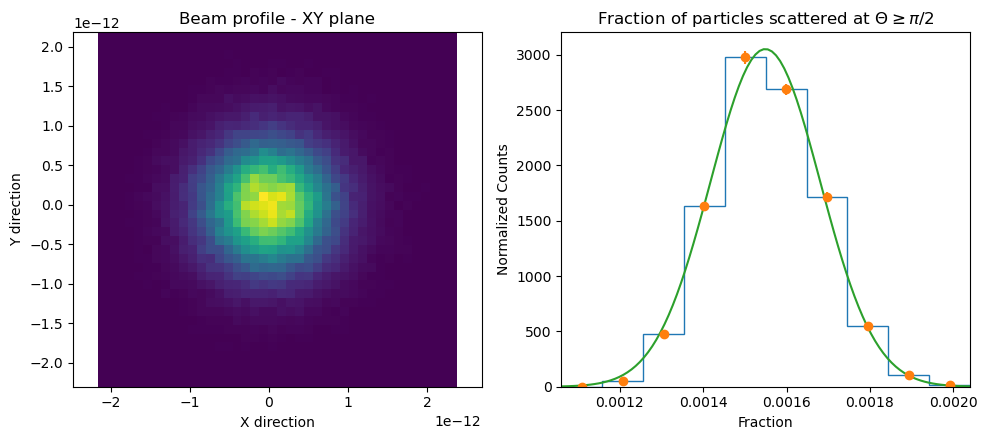

In [10]:
# showing the beam
fig = plt.figure(figsize=(10,4.5))
ax = plt.subplot2grid((1,2), loc=(0,0), fig=fig)
ax.hist2d(particle_X, particle_Y, bins=40, density=True)
ax.set_xlim(left=particle_X.min(), right=particle_X.max())
ax.set_ylim(bottom=particle_Y.min(), top=particle_Y.max())
ax.set_xlabel("X direction")
ax.set_ylabel("Y direction")
ax.set_title("Beam profile - XY plane")
ax.axis('equal')

# plotting the simulation data
sim_data = np.array(sim_data)
ax_1 = plt.subplot2grid((1,2), loc=(0,1), fig=fig)
scatter_Counts, scatter_edgeBins, scatter_patches = ax_1.hist(sim_data, density=True, histtype='step')
scatter_centerBins = 0.5*(scatter_edgeBins[1:]+scatter_edgeBins[:-1])
ax_1.errorbar(scatter_centerBins, scatter_Counts,
              np.sqrt(scatter_Counts),
              ms=12, fmt='.')
ax_1.set_xlim(left=sim_data.min(), right=sim_data.max())
# fitting
def f_fit(x, A, mu, sig):
    return 1.0*A/(sig*np.sqrt(2*np.pi))*np.exp(-0.5*((x-mu)**2/(2*sig*sig)))
from scipy.optimize import curve_fit
fit_params, fit_cov = curve_fit(f_fit, scatter_centerBins, scatter_Counts, p0=(800, 0.0015, 0.001))
x_func = np.linspace(sim_data.min(), sim_data.max(), 100)
ax_1.plot(x_func, f_fit(x_func, *(fit_params)))
ax_1.set_title("Fraction of particles scattered at $\Theta \geq \pi/2$")
ax_1.set_xlabel("Fraction")
ax_1.set_ylabel("Normalized Counts")
fig.tight_layout()

print("Mean number of back-scattered particles is: %7.5f +/- %7.5f"%(fit_params[1], np.sqrt(fit_cov.diagonal())[1]))
print("Sigma of back-scattered distribution is: %7.5f +/- %7.5f"%(fit_params[2], np.sqrt(fit_cov.diagonal())[2]))                            


3\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function 

$$f(x) =\sin^2{\frac{1}{x(2-x)}}$$

* Compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one

1.451842
0.009016997061106318
fit mean: 1.451898961734692
fit stds: [0.211  0.0004 0.0004]


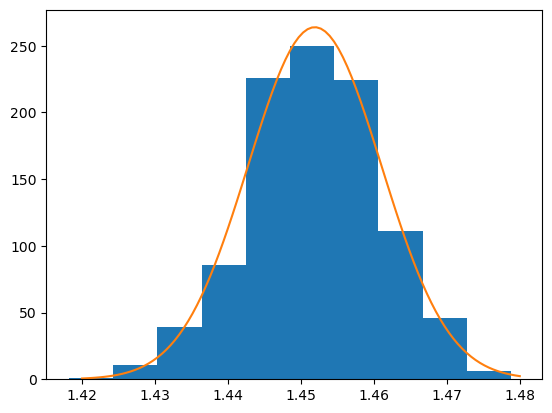

In [11]:
# hit or miss method
def f(x):
    return np.sin(1.0/(x*(2-x)))**2

# calculating integrals
I_values = []
N_iter = 10**3
N_trials = 10**4
for it in range(N_iter):
    # generating uniform x-s between 0 and 2
    x = np.random.random(N_trials)*2
    # generating uniform y between 0 and 1
    y = np.random.random(N_trials)
    # counting hits
    hits = np.sum(y < f(x))
    I_values.append(hits)
# rescaling the integrals by the constant factor
I_values = np.array(I_values)*2/N_trials
print(np.mean(I_values))
print(np.std(I_values))
# now to try a thing
counts,edges,patches = plt.hist(I_values)
def fitf(x, A, m, s):
    return 1.0*A/(s*np.sqrt(2.0*np.pi))*np.exp(-0.5*((x-m)**2/(s**2)))

p, cov = curve_fit(fitf, 0.5*(edges[1:]+edges[:-1]), counts, p0=(300, 1.45, 0.1))
print("fit mean:",p[1])
print("fit stds:",np.sqrt(cov.diagonal()))
x_func = np.linspace(1.42,1.48,100)
plt.plot(x_func, fitf(x_func, *(p)))

In [17]:
# mean value method
# sampling uniformly between 0 and 2
N_samples = 1000

x_samples = np.random.random(N_samples)*2
# computing f(x_samples)
y_sum = np.sum(f(x_samples))
I = (2.0/N_samples)*y_sum
print(I)
# computing the error, trying at least
ex_fsquared = 1.0/N_samples * np.sum(f(x_samples)**2)
ex_f = (1.0/N_samples * y_sum)**2
std = np.sqrt(ex_fsquared - ex_f)*2/np.sqrt(N_samples)
print(std)
print("="*20)
# trying with the other method
Is = []
for it in range(10**3):
    x_samples = np.random.random(N_samples)*2
    # computing f(x_samples)
    y_sum = np.sum(f(x_samples))
    I = (2.0/N_samples)*y_sum
    Is.append(I)
Is = np.array(Is)
# now i have all the integrals, so
print(Is.mean())
print(Is.std())
print("="*20)
# trying again with another
counts, binEdges = np.histogram(Is)
fpar, fcov = curve_fit(fitf, 0.5*(binEdges[1:]+binEdges[:-1]), counts, p0=[200, 1.4, 0.1])
print(fpar[1])
print(fpar[2])

1.4264519213262266
0.017393598400847296
1.451283866525364
0.016677371090107772
1.4519805542668716
0.016772368949499645


4\. **Monte Carlo integration in high dimension**

* Start of by computing the area of a circle of unit radius, by integrating the function 

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere



In [58]:
def f_circ(x, y):
    sum_sq = x**2 + y**2
    return np.sum(sum_sq <= 1)

def f_hypersphere(X):
    sum_sq = np.matmul(X.T, X)
    return np.sum(sum_sq.diagonal() <= 1)

In [7]:
N_pt = 2000
# generating x and y uniformly between -1 and 1
x = np.random.uniform(-1, 1, N_pt)
y = np.random.uniform(-1, 1, N_pt)
# evaluating the function on the random points
sum_f = f_circ(x,y)
I_f = (4/(N_pt))*sum_f
print("Integral:",I_f)

Integral: 3.132


In [72]:
# for a 10 dimensional sphere
N_pt = 20000
N_dims = 2
# generating dimensions
xs = np.array([np.random.uniform(-1, 1, N_pt) for _ in range(N_dims)])
f_hypersphere(xs)*(2**N_dims/(N_pt))

3.1434

5\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should get a result about 0.84

In [74]:
# need to sample from f(x)/w(x) which is luckily just 1 / (1 + exp(x)) so:
n = 10**6
y = 1.0 / (1.0 + 1.0/stats.expon().rvs(n))
# now I have just to sum over
I = 2.0/n * np.sum(y)
print(I)

0.8071455840915993
